<a href="https://colab.research.google.com/github/sserrata/cortex-ml-experiment/blob/master/cortex_ml_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://pancloud.readthedocs.io/en/latest/_static/sdk.png" width="150" /> 

Cortex Machine Learning Experiment
=============================

**Author:** `Steven Serrata <https://github.com/sserrata>`

This ML tutorial demonstrates how time-series forecasting may be used to predict the number of 
critical severity threats we'll see in the coming hours. All this so our busy SOC Analyst can take a
lunch break without fear of being interrupted by another alert.



Methodology
===========

**Required python packages:**

* **maya** – “datetime for humans”
* **pandas** – popular library for data analysis
* **pancloud** – Cortex ™ SDK, used to collect time-series data used to train model
* **prophet** – Tunable forecasting library developed by Facebook’s core data science team




**Procedure:**


*   Use **maya** to construct a generator of hourly intervals beginning from the start date
*   Use **pancloud** to loop through the intervals while performing the following query:
    *   SELECT COUNT(*) from panw.threat WHERE severity = 'critical' LIMIT 0
*   Record results in pandas dataframe and write to CSV file

* **Note**: date range is from 4/20/2019 to 6/5/2019*

`datacollection.py`: https://gist.github.com/sserrata/9f4d37574d87f1e541b98e6de3a6317f

`hourly_records.csv`: https://gist.githubusercontent.com/sserrata/9a84e7e3adabe919b302572bb6882e97




In [0]:
import pandas as pd
from fbprophet import Prophet

In [0]:
# Use pandas to read CSV, convert datetime to local timezone and display last 
# 5 rows of dataframe (local timezone is US/Pacific for this dataset).

url = 'https://gist.githubusercontent.com/sserrata/9a84e7e3adabe919b302572bb6882e97/raw/a74664ec6737008e43dca1437e01f762b726d54a/hourly_records.csv'
df = pd.read_csv(url)
df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize('GMT').dt.tz_convert('US/Pacific').dt.tz_localize(None)
df.tail(5)

,ds,y
1116,2019-06-05 05:00:00,133
1117,2019-06-05 06:00:00,61
1118,2019-06-05 07:00:00,51
1119,2019-06-05 08:00:00,51
1120,2019-06-05 09:00:00,0


In [0]:
# Create an instance of the Prophet class and then fit our dataframe to it.
# Attempt to determine if daily seasonality exists. Ostensibly, this is where
# Prophet attempts to determine the best model and fit, based on the training set.

m = Prophet(daily_seasonality=True)
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [0]:
# Create a dataframe with the dates for which we want a prediction to be made 
# with make_future_dataframe(). Specify the number of hours to forecast using 
# the periods parameter and set the frequency to hourly.

future = m.make_future_dataframe(periods=24, freq='H')
future.tail(24)

,ds
1121,2019-06-05 10:00:00
1122,2019-06-05 11:00:00
1123,2019-06-05 12:00:00
1124,2019-06-05 13:00:00
1125,2019-06-05 14:00:00
1126,2019-06-05 15:00:00
1127,2019-06-05 16:00:00
1128,2019-06-05 17:00:00
1129,2019-06-05 18:00:00
1130,2019-06-05 19:00:00


In [0]:
# Make prediction and store the results in the forecast dataframe.

forecast = m.predict(future)

# Select date series, prediction, and upper and lower confidence levels.

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

,ds,yhat,yhat_lower,yhat_upper
1121,2019-06-05 10:00:00,21.762883,-96.672056,134.547348
1122,2019-06-05 11:00:00,35.689171,-80.852957,152.167231
1123,2019-06-05 12:00:00,37.965465,-80.320574,139.557209
1124,2019-06-05 13:00:00,25.050525,-84.133447,130.082917
1125,2019-06-05 14:00:00,7.527491,-104.795143,121.276550
1126,2019-06-05 15:00:00,-1.604918,-107.515542,120.974462
1127,2019-06-05 16:00:00,0.609550,-116.518166,124.435887
1128,2019-06-05 17:00:00,5.927686,-113.284884,109.857800
1129,2019-06-05 18:00:00,5.061852,-115.226164,120.637345
1130,2019-06-05 19:00:00,-2.157518,-117.214983,106.613471


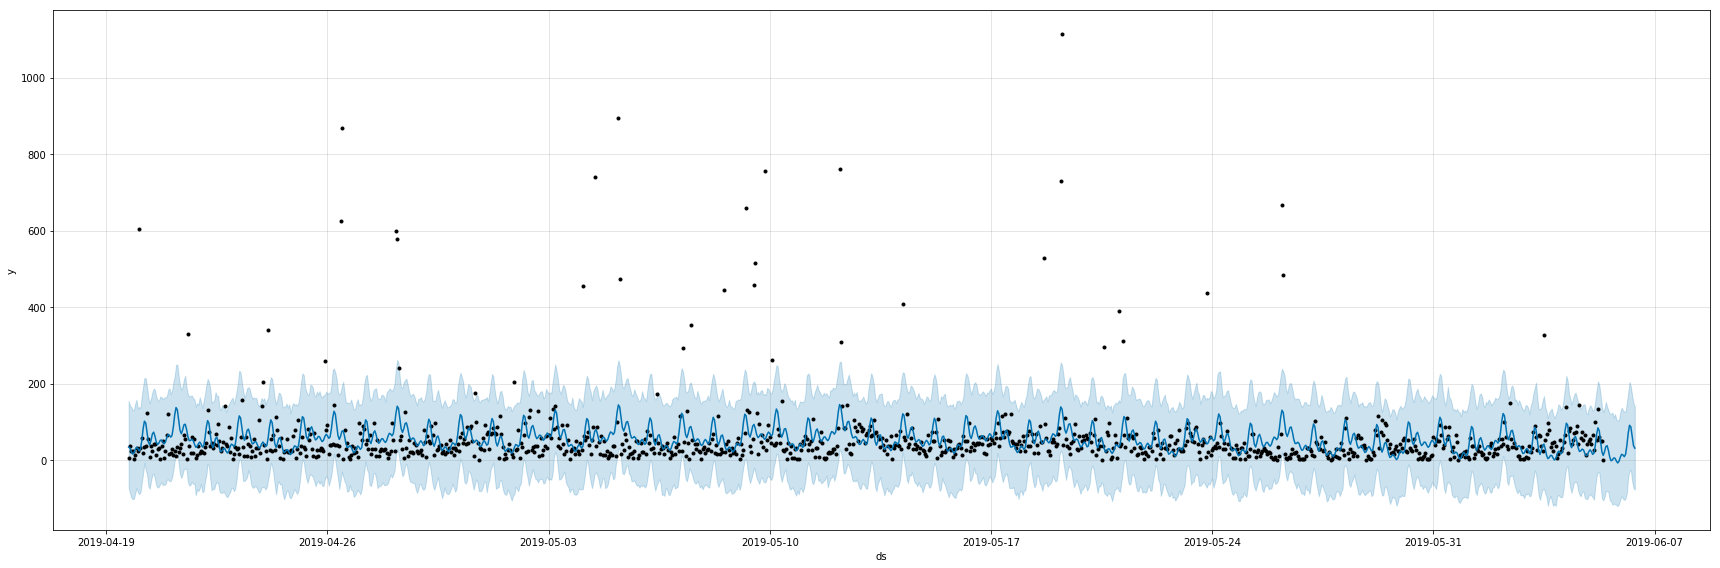

In [0]:
# Plot forecast (using matplotlib to enlarge plot)
# Note that support for figsize is coming in next release.
# Normally, you would use m.plot(forecast).

from matplotlib import pyplot as plt
from matplotlib.dates import (AutoDateLocator, AutoDateFormatter)

figsize=(24, 8)
fig = plt.figure(facecolor='w', figsize=figsize)
ax = fig.add_subplot(111)
fcst_t = forecast['ds'].dt.to_pydatetime()
ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.')
ax.plot(fcst_t, forecast['yhat'], ls='-', c='#0072B2')
if 'cap' in forecast and plot_cap:
    ax.plot(fcst_t, forecast['cap'], ls='--', c='k')
if m.logistic_floor and 'floor' in forecast and plot_cap:
    ax.plot(fcst_t, forecast['floor'], ls='--', c='k')
if True:
    ax.fill_between(fcst_t, forecast['yhat_lower'], forecast['yhat_upper'],
                    color='#0072B2', alpha=0.2)
locator = AutoDateLocator(interval_multiples=False)
formatter = AutoDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_xlabel('ds')
ax.set_ylabel('y')
fig.tight_layout()

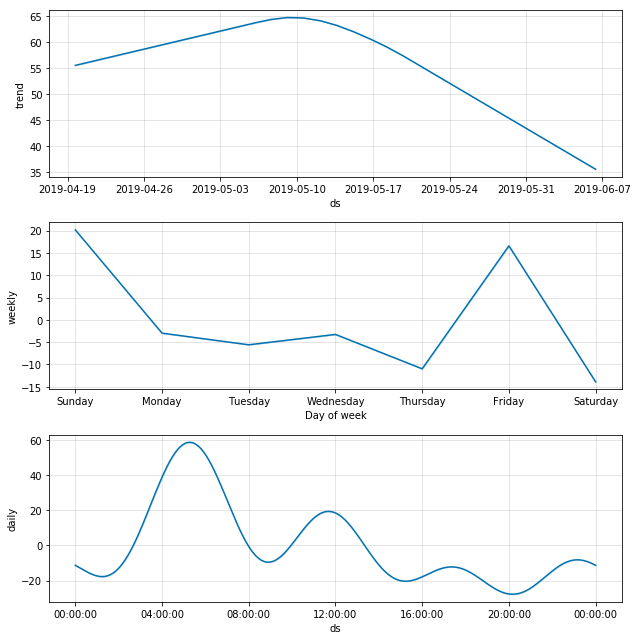

In [0]:
# Plot forecast components to understand weekly and daily trends.

fig2 = m.plot_components(forecast)

Conclusion
=========

If you look closely at the daily chart you'll notice a seasonal decrease in critical severity threats appears to occur around 15:00 hours.
Other notable drop offs occur at approximately 20:00 hours and 01:00 hours, which fall well outside of normal business hours. That said, a busy SOC analyst's best option for lunch is likely 15:00, at least in the foreseeable future.